In [15]:
import os
import pandas as pd
from sklearn.metrics import classification_report, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def load_predictions(prediction_dir):
    predictions = {}
    for file_name in os.listdir(prediction_dir):
        if file_name.endswith('.csv'):
            model_name = os.path.splitext(file_name)[0]
            file_path = os.path.join(prediction_dir, file_name)
            df = pd.read_csv(file_path)
            predictions[model_name] = df
    return predictions

def calculate_metrics(predictions):
    metrics = {}
    for model_name, df in predictions.items():
        true_labels = df['true_label']
        predicted_labels = df['prediction']
        
        f1_micro = f1_score(true_labels, predicted_labels, average='micro')
        f1_macro = f1_score(true_labels, predicted_labels, average='macro')
        f1_weighted = f1_score(true_labels, predicted_labels, average='weighted')
        accuracy = accuracy_score(true_labels, predicted_labels)        
        metrics[model_name] = {'f1_micro': f1_micro, 'f1_macro': f1_macro, 'f1_weighted': f1_weighted,'accuracy': accuracy}

    return metrics

def plot_metrics(metrics, classification_type):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    va_position = 'top'

    # Plot F1 micro
    f1_micro_bars = axes[0, 0].bar(metrics.keys(), [metric['f1_micro'] for metric in metrics.values()], color='skyblue')
    axes[0, 0].set_xlabel('Model')
    axes[0, 0].set_ylabel('F1 Micro')
    axes[0, 0].set_title(f'F1 Micro: {classification_type}')
    axes[0, 0].tick_params(axis='x', rotation=90)
    axes[0, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 0].set_ylim(0, 1)
    for bar in f1_micro_bars:
        yval = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot F1 macro
    f1_macro_bars = axes[0, 1].bar(metrics.keys(), [metric['f1_macro'] for metric in metrics.values()], color='indianred')
    axes[0, 1].set_xlabel('Model')
    axes[0, 1].set_ylabel('F1 Macro')
    axes[0, 1].set_title(f'F1 Macro: {classification_type}')
    axes[0, 1].tick_params(axis='x', rotation=90)
    axes[0, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0, 1].set_ylim(0, 1)
    for bar in f1_macro_bars:
        yval = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot F1 weighted
    f1_weighted_bars = axes[1, 0].bar(metrics.keys(), [metric['f1_weighted'] for metric in metrics.values()], color='plum')
    axes[1, 0].set_xlabel('Model')
    axes[1, 0].set_ylabel('F1 Weighted')
    axes[1, 0].set_title(f'F1 Weighted: {classification_type}')
    axes[1, 0].tick_params(axis='x', rotation=90)
    axes[1, 0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 0].set_ylim(0, 1)
    for bar in f1_weighted_bars:
        yval = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    # Plot accuracy
    accuracy_bars = axes[1, 1].bar(metrics.keys(), [metric['accuracy'] for metric in metrics.values()], color='darkseagreen')
    axes[1, 1].set_xlabel('Model')
    axes[1, 1].set_ylabel('Accuracy')
    axes[1, 1].set_title(f'Accuracy: {classification_type}')
    axes[1, 1].tick_params(axis='x', rotation=90)
    axes[1, 1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1, 1].set_ylim(0, 1)
    for bar in accuracy_bars:
        yval = bar.get_height()
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va=va_position)

    plt.tight_layout()
    # plt.savefig(f'{classification_type}_results.png')
    plt.show()

def plot_class_performance(predictions, classification_type, label_mapping):
    for model_name, df in predictions.items():
        true_labels = df['true_label']
        predicted_labels = df['prediction']
        
        report = classification_report(true_labels, predicted_labels, output_dict=True)
        class_names = [label for label, idx in label_mapping.items()]  # Extract textual class labels
        metrics = {label: report[str(idx)] for label, idx in label_mapping.items()}
        
        num_classes = len(class_names)
        fig, ax = plt.subplots(figsize=(12, 6))
        bar_width = 0.2
        index = np.arange(num_classes)
        colors = ['skyblue', 'lightgreen', 'salmon']  # Colors for F1, accuracy, and recall
        
        # Plot bars for each metric
        for i, metric in enumerate(['f1-score', 'precision', 'recall']):
            metric_values = [metrics[class_name][metric] for class_name in class_names]
            ax.bar(index + (i * bar_width), metric_values, bar_width, label=metric, color=colors[i])
        
        ax.set_xlabel('Class')
        ax.set_ylabel('Score')
        ax.set_title(f'Class-wise Performance: {model_name}')
        ax.set_xticks(index + bar_width)
        ax.set_xticklabels(class_names, rotation=90)
        ax.legend()
        plt.tight_layout()
        # plt.savefig(f'{model_name}_{classification_type}_class_performance.png')
        plt.show()

def main(classification_type):

    if classification_type == 'binary':
        prediction_dir = '../../models/transformers/evaluations/binary/predictions'
        label_mapping = {
            'Rest': 0,
            'Animal': 1
        }
    elif classification_type == 'multi':
        prediction_dir = '../../models/transformers/evaluations/multi/predictions'
        label_mapping = {
            'Remaining': 0,
            'Non-systematic-review': 1,
            'Human-non-RCT-non-drug-intervention': 2,
            'Human-non-RCT-drug-intervention': 3,
            'Human-case-report': 4,
            'Animal-other': 5,
            'Animal-drug-intervention': 6,
            'Human-systematic-review': 7,
            'In-vitro-study': 8,
            'Human-RCT-non-drug-intervention': 9,
            'Animal-non-drug-intervention': 10,
            'Human-RCT-drug-intervention': 11,
            'Clinical-study-protocol': 12,
            'Human-RCT-non-intervention': 13
        }

    predictions = load_predictions(prediction_dir)
    metrics = calculate_metrics(predictions)
    plot_metrics(metrics, classification_type)
    plot_class_performance(predictions, classification_type, label_mapping)


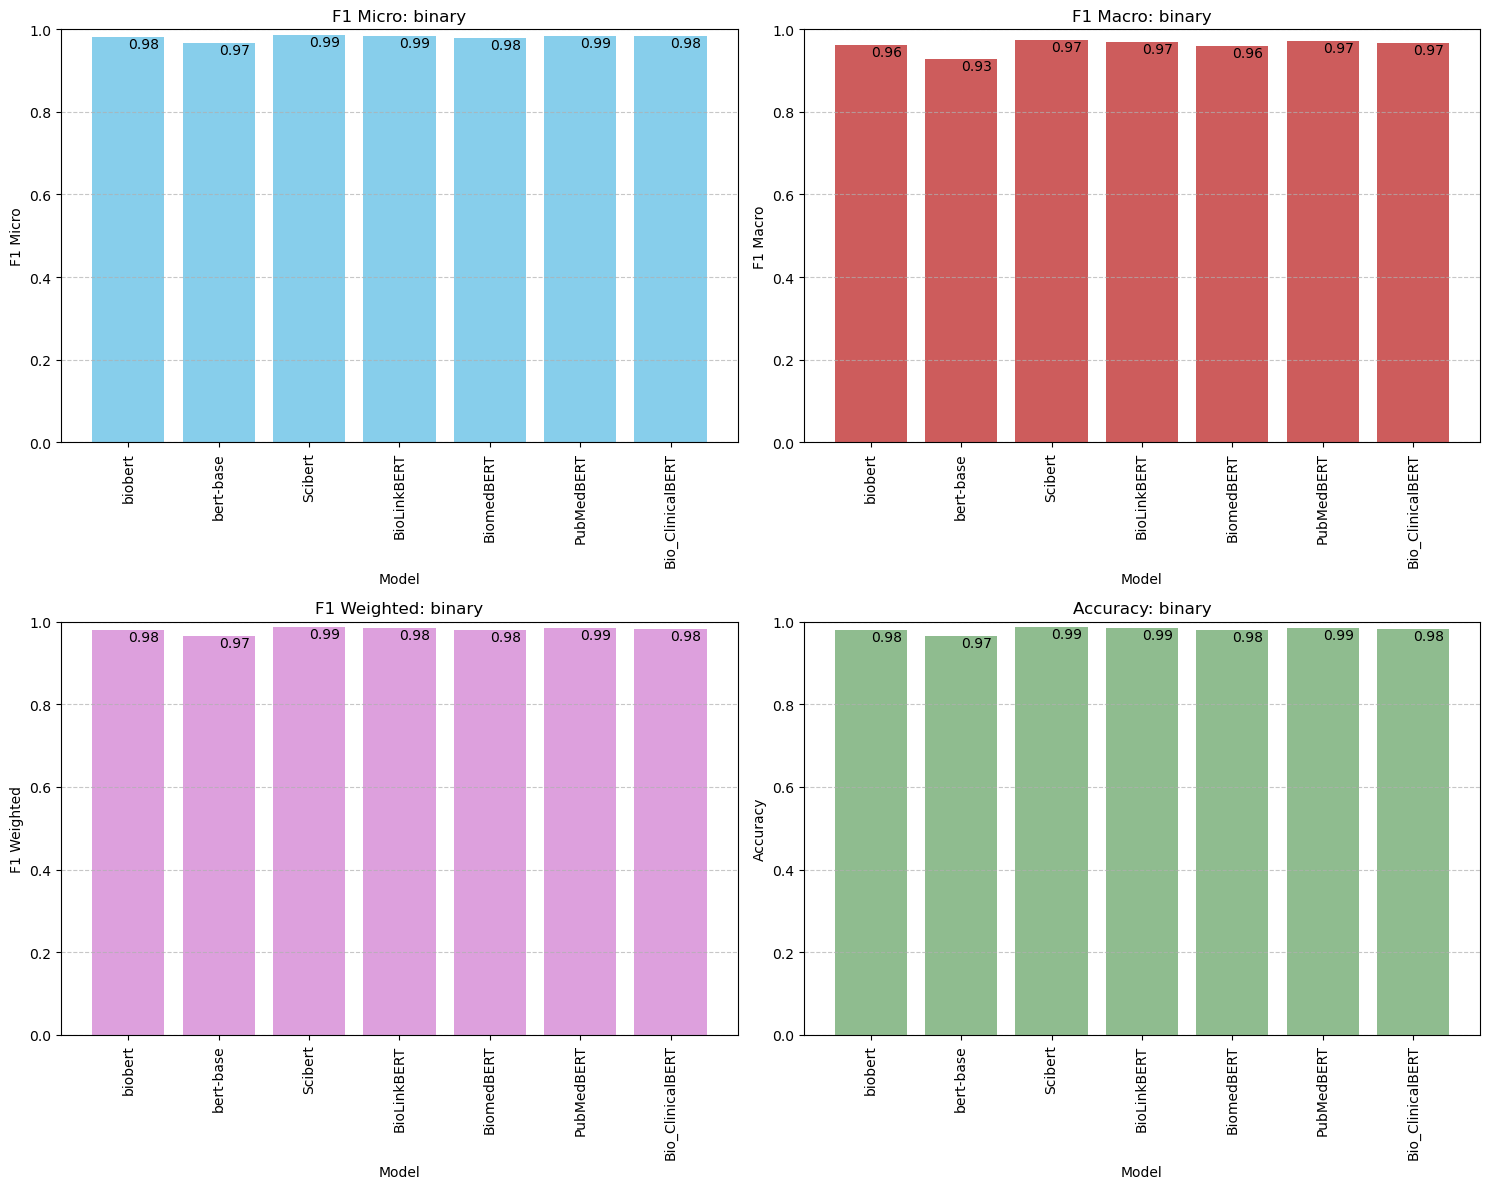

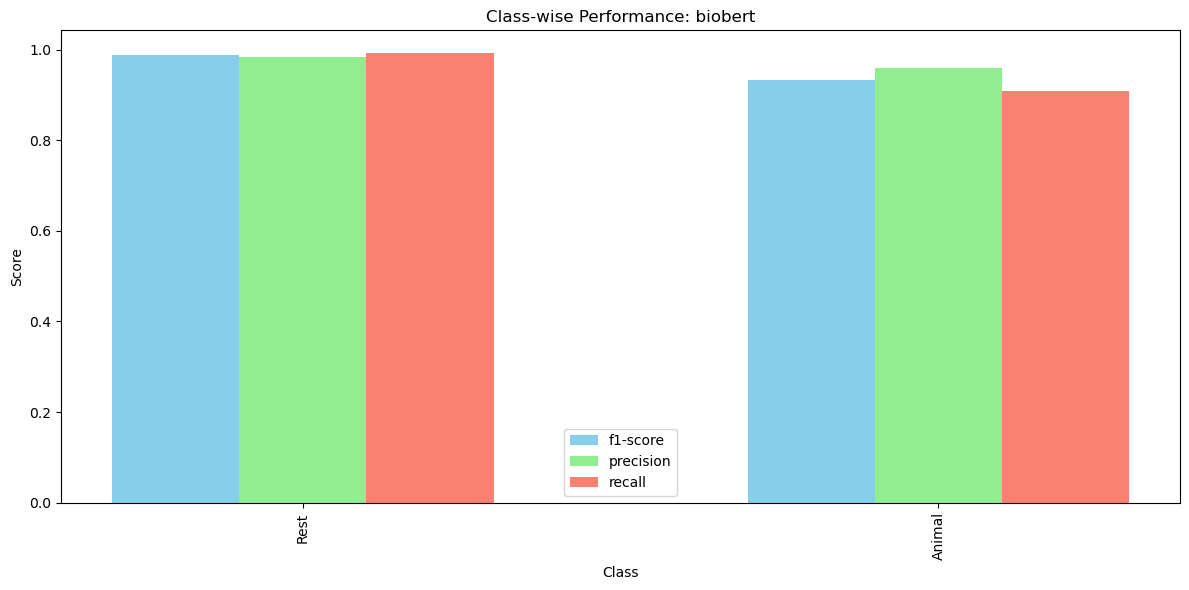

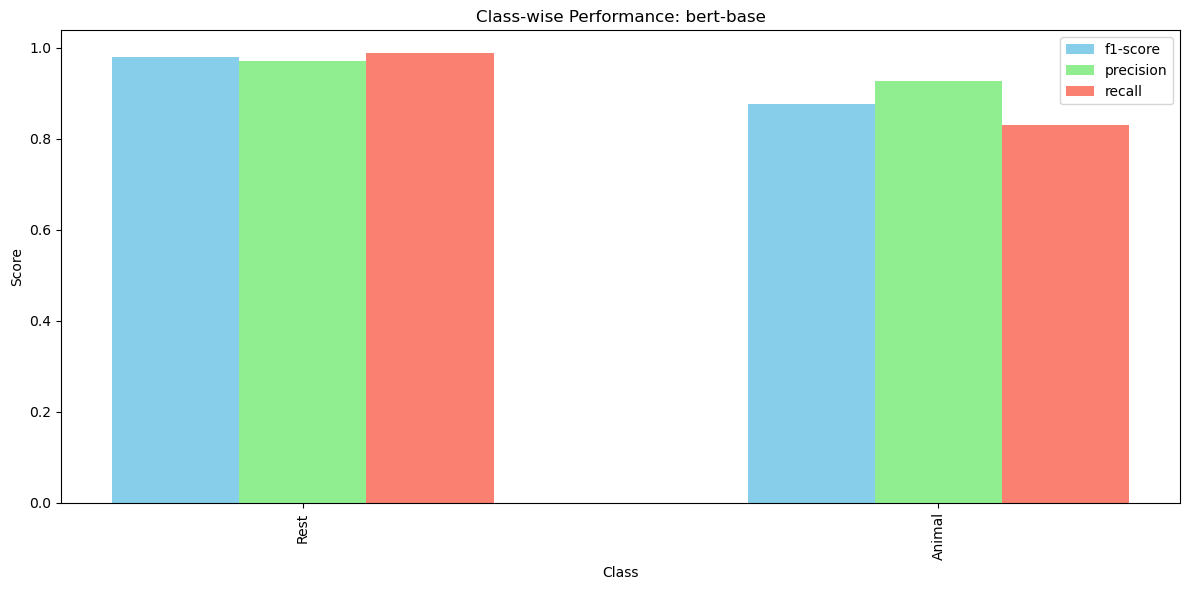

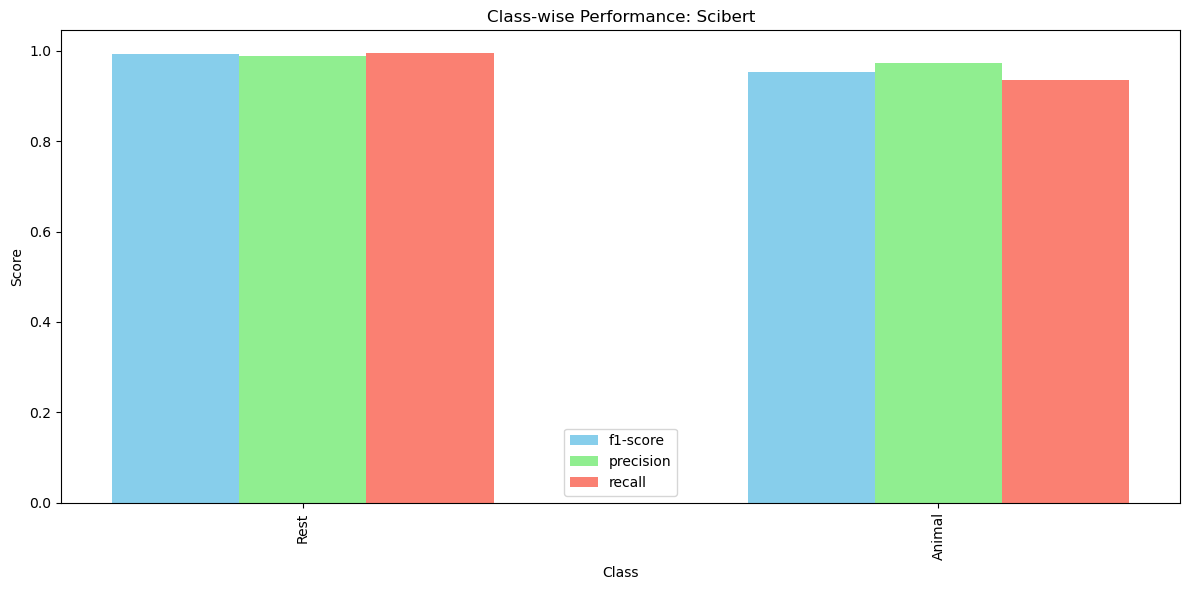

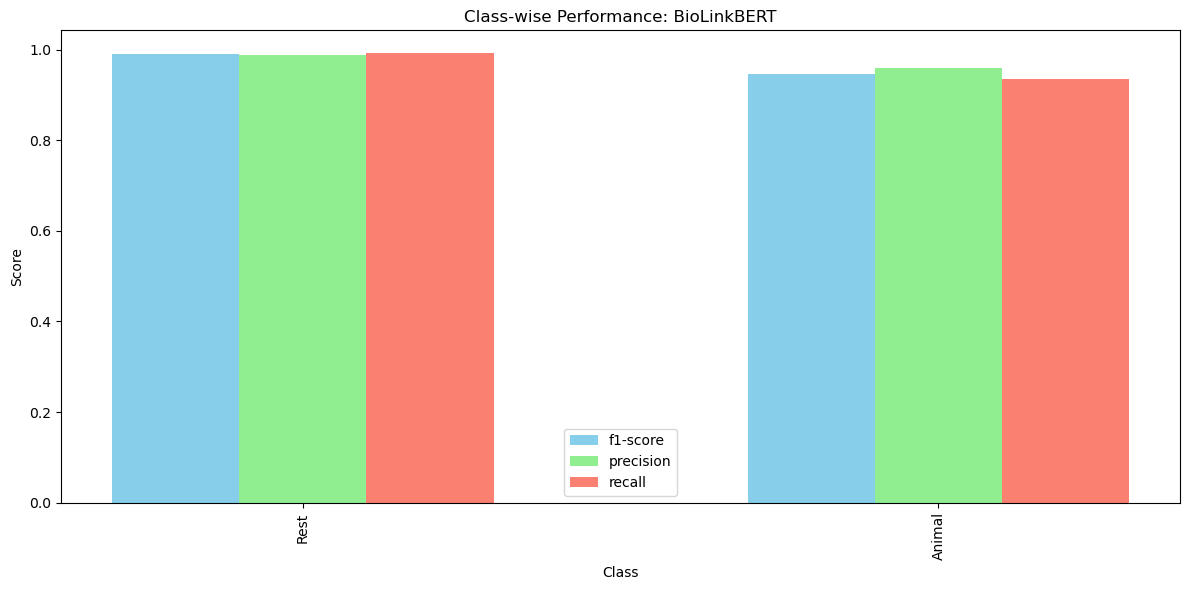

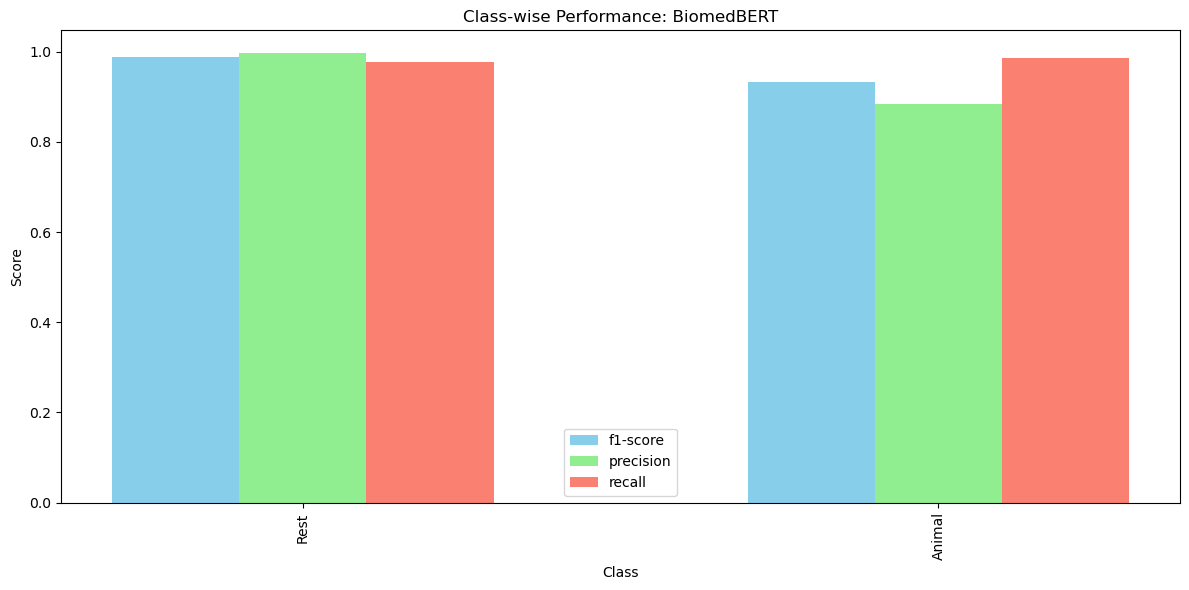

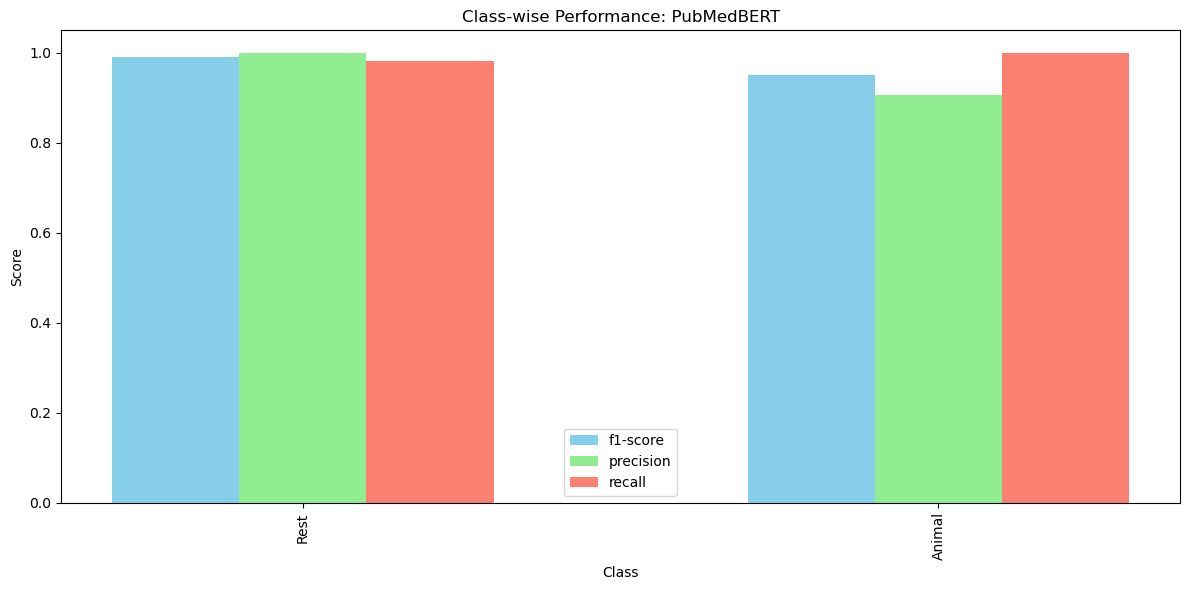

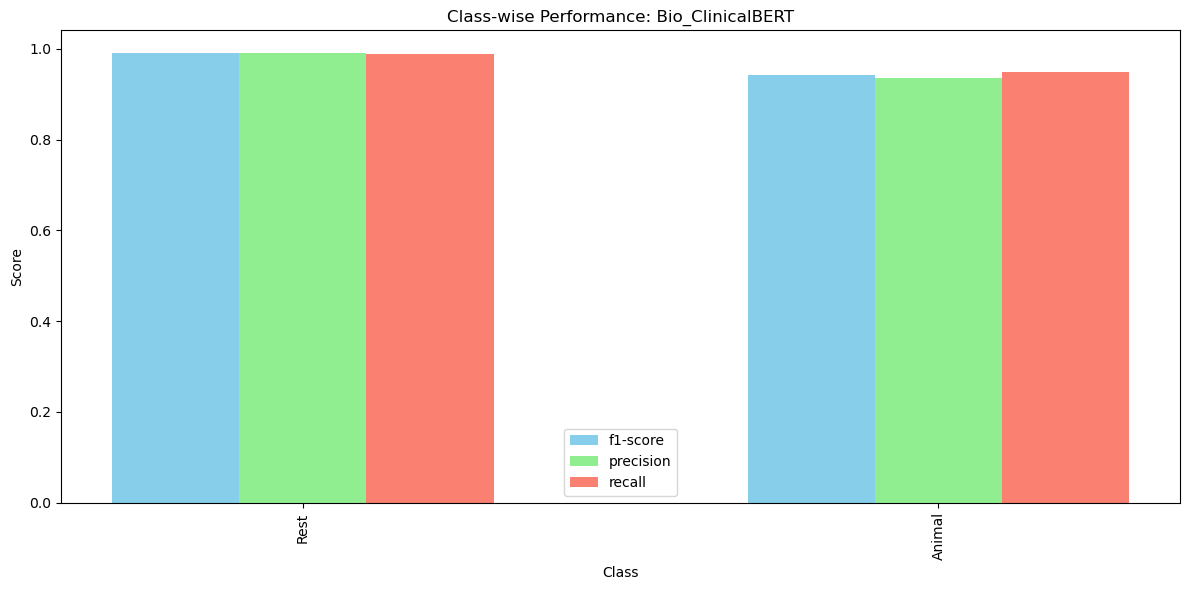

In [16]:
if __name__ == "__main__":
    main(classification_type='binary')

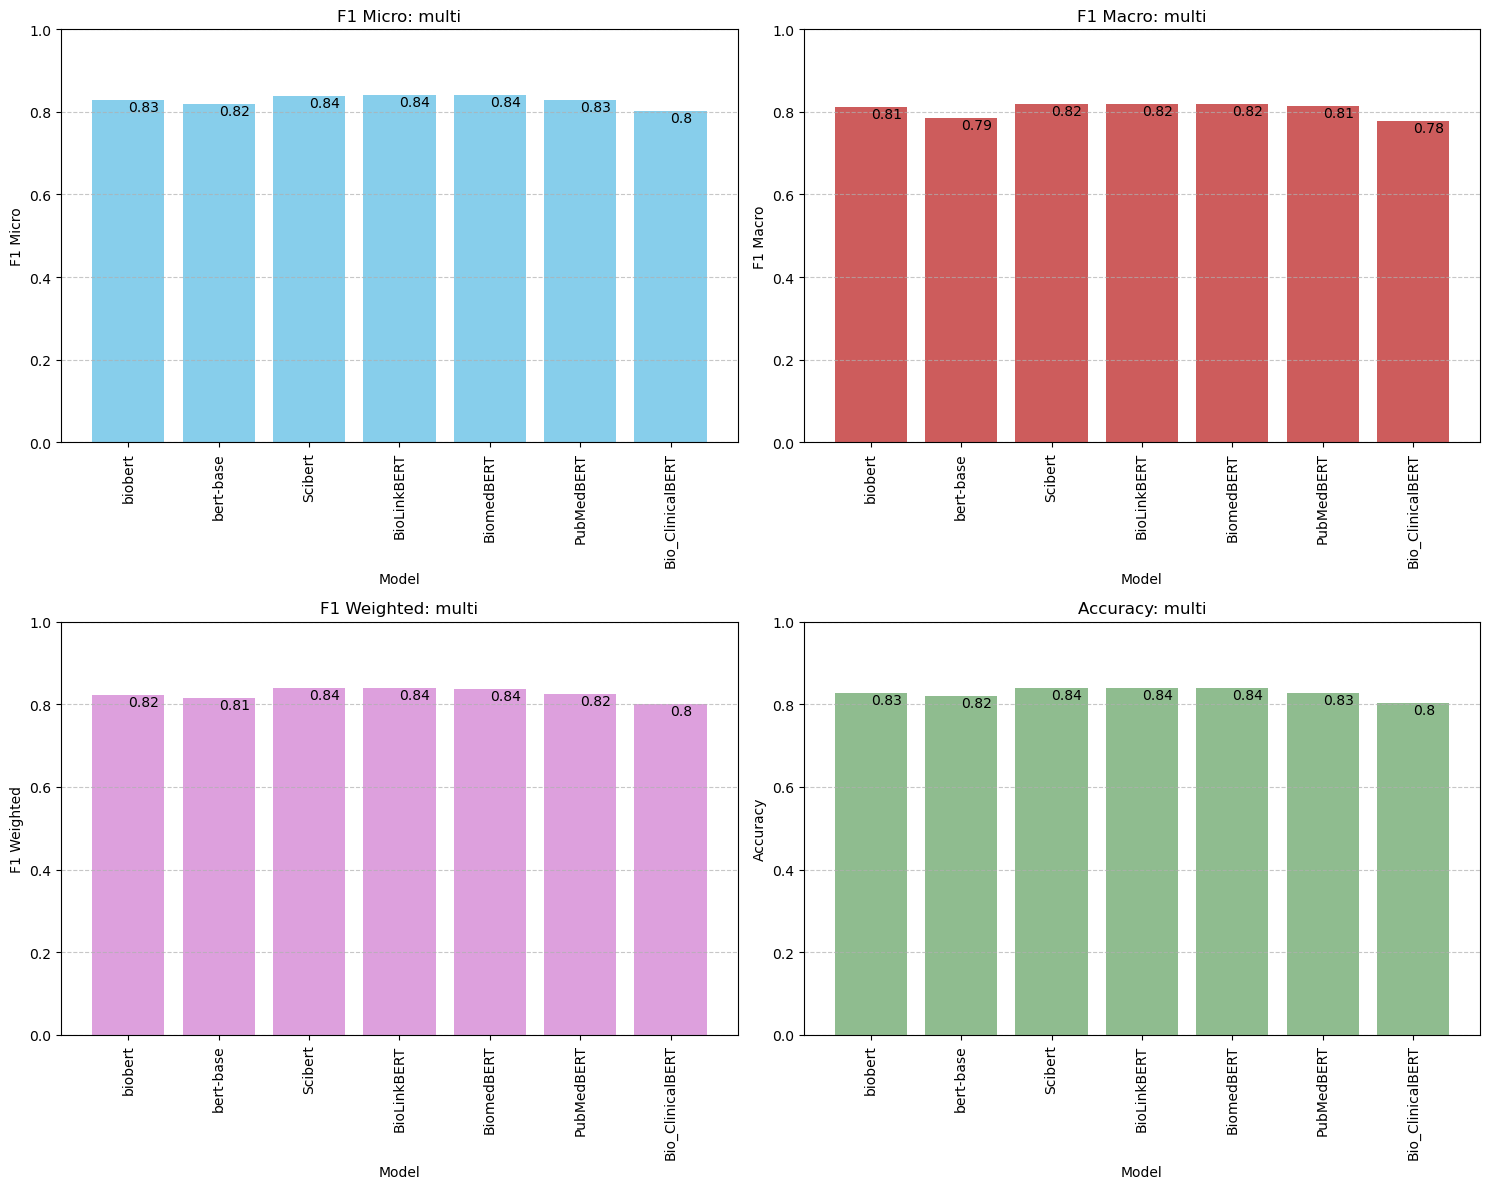

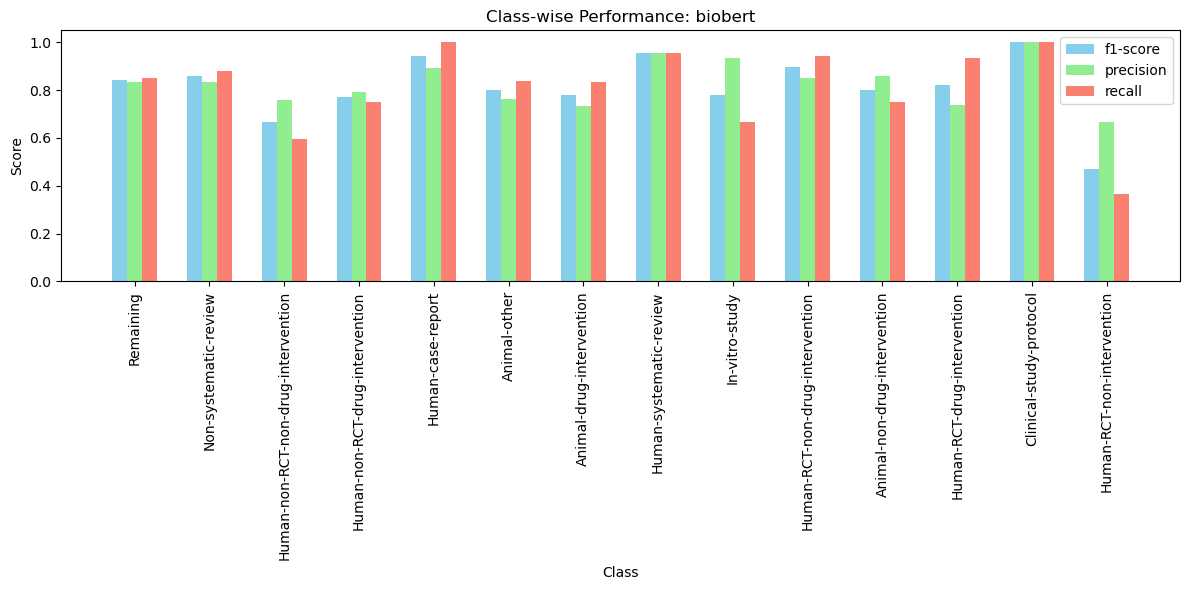

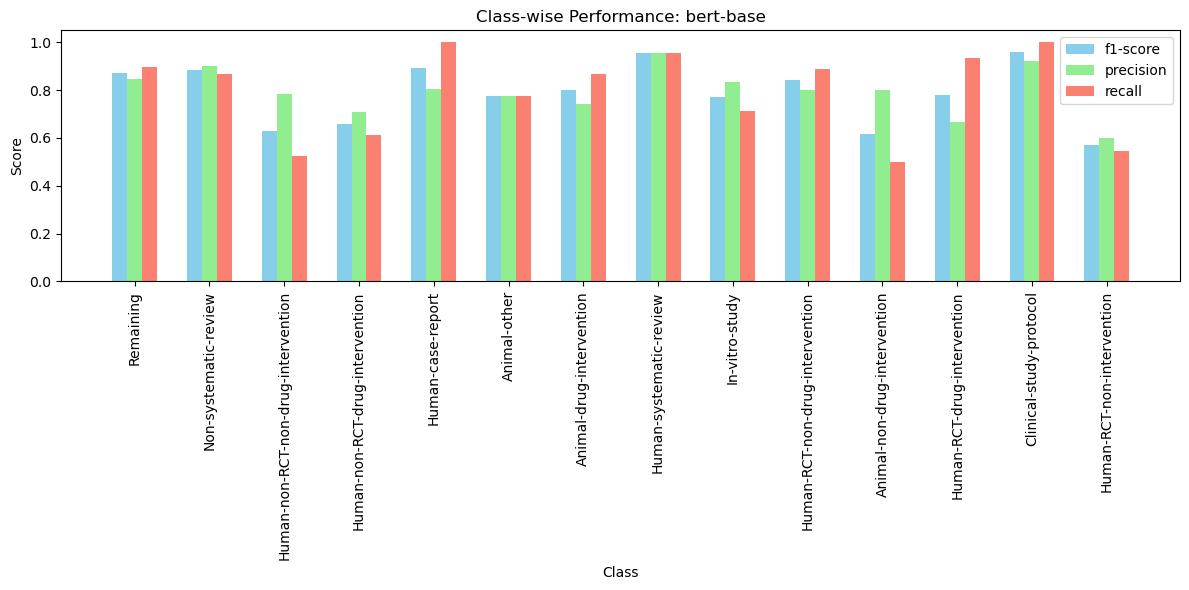

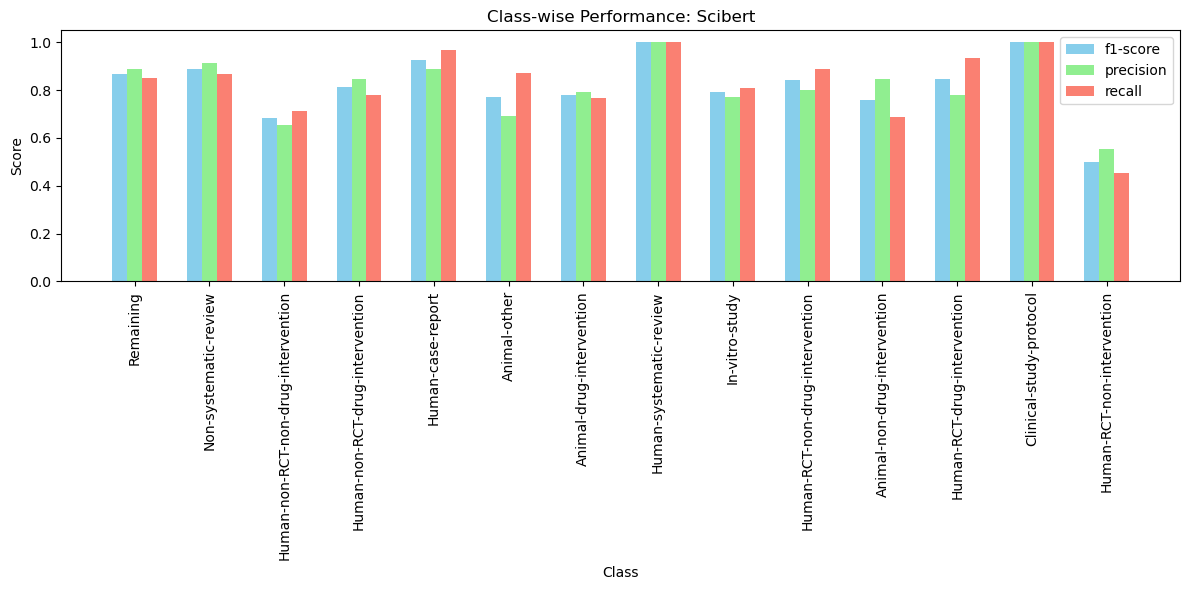

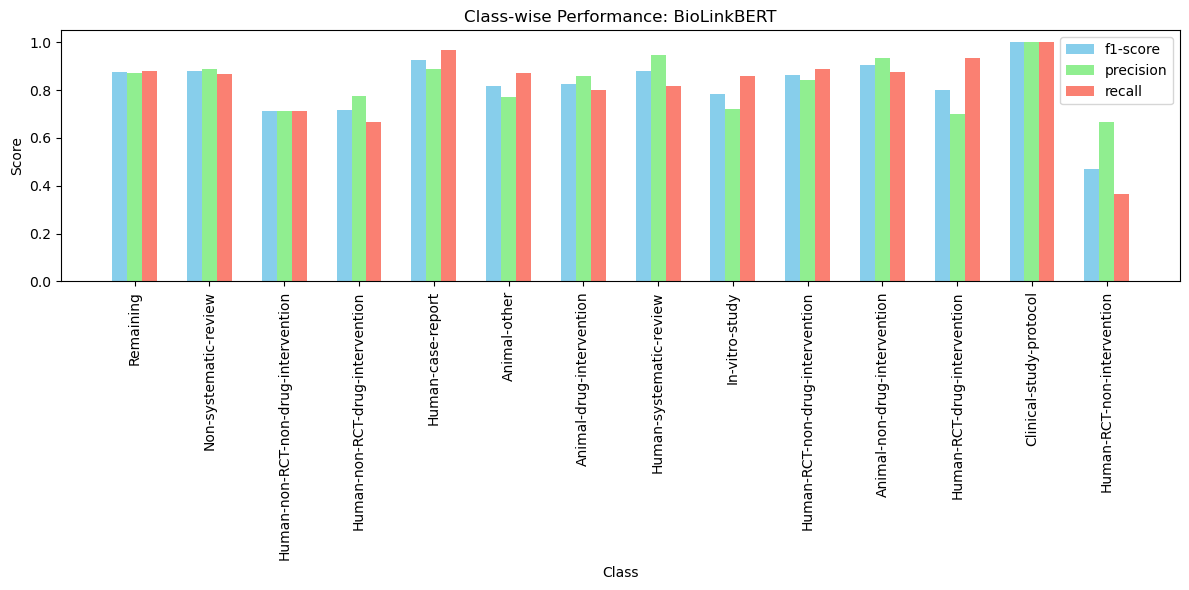

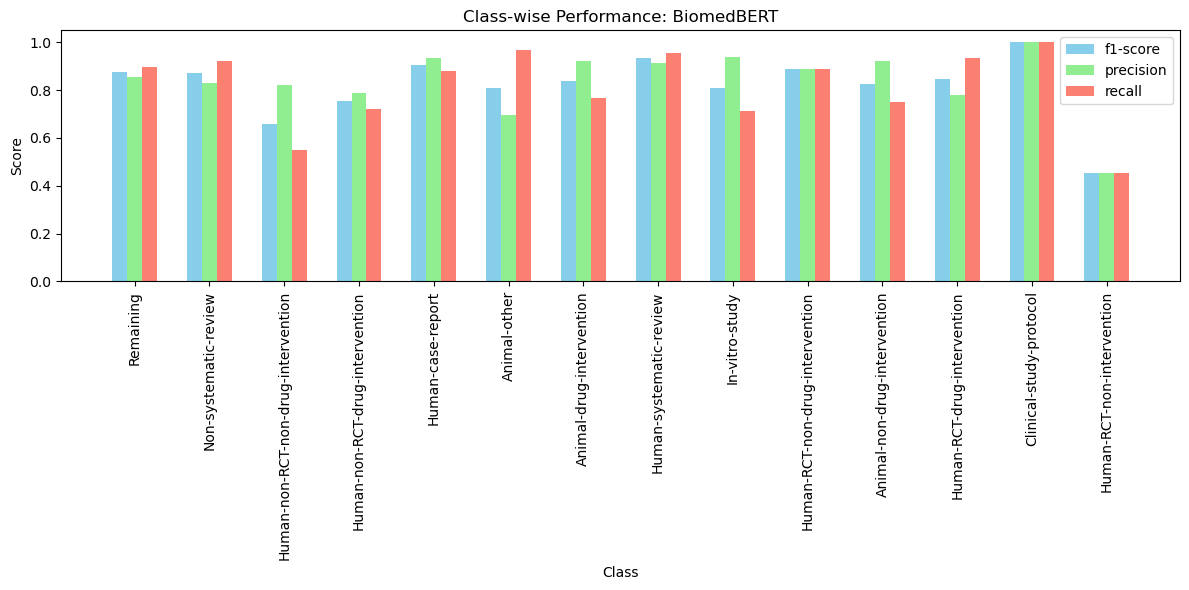

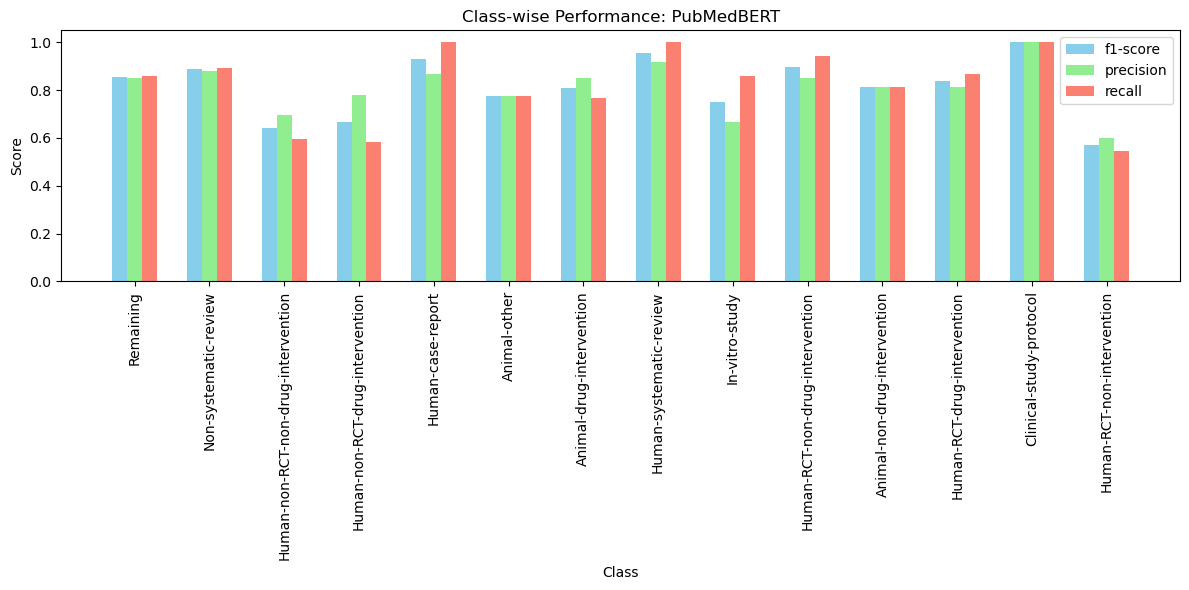

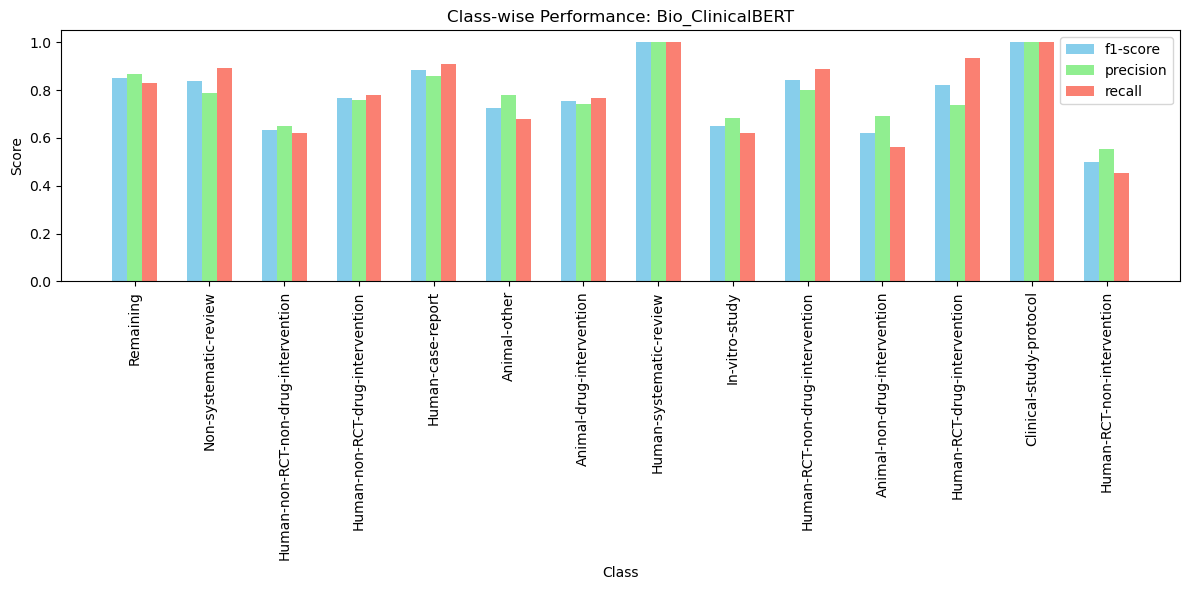

In [17]:
if __name__ == "__main__":
    # TODO select classification type (binary, multi)
    main(classification_type='multi')